# Capacitor Safety Discharge Calculator

This calculator computes either the discharge time or required resistance to safely lower the voltage across a capacitor using an RC circuit. It also plots the voltage over time with key discharge points and calculates initial power and total energy.

---


In [1]:
import calc_capacitor_discharge as dis
import inspect
from IPython.display import Markdown, display

In [2]:
# Display all core calculation functions except plot_discharge
for func in [
    dis.solve_time,
    dis.solve_resistance,
    dis.initial_power,
    dis.time_constant,
    dis.total_energy,
]:
    display(Markdown(f"### 📦 `{func.__name__}` function"))
    print(inspect.getsource(func))

### 📦 `solve_time` function

def solve_time(V0, Vt, R, C):
    if Vt >= V0:
        raise ValueError("Threshold voltage must be less than initial voltage.")
    return -R * C * math.log(Vt / V0)



### 📦 `solve_resistance` function

def solve_resistance(V0, Vt, t, C):
    if Vt >= V0:
        raise ValueError("Threshold voltage must be less than initial voltage.")
    return -t / (C * math.log(Vt / V0))



### 📦 `initial_power` function

def initial_power(V0, R):
    return (V0**2) / R



### 📦 `time_constant` function

def time_constant(R, C):
    return R * C



### 📦 `total_energy` function

def total_energy(C, V0):
    return 0.5 * C * V0**2



🔁 Solve for Resistance
Required Resistance: 6213.35 Ω
Initial Power: 0.402 W
Time Constant (τ): 0.621 s
Total Energy: 0.125 J


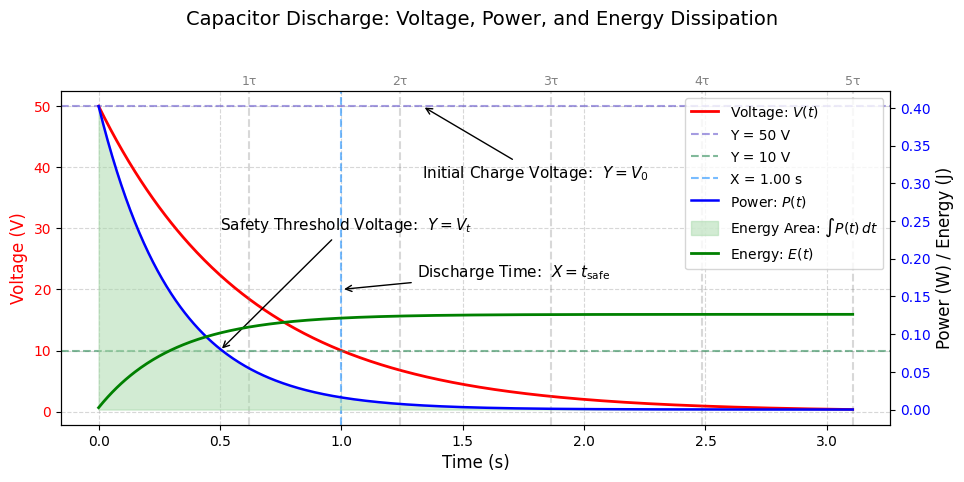

In [3]:
# Example variables
V0 = 50
Vt = 10
C_uF = 100
t_sec = 1.0  # Desired discharge time [s]

C = C_uF * 1e-6
R = dis.solve_resistance(V0, Vt, t_sec, C)
power = dis.initial_power(V0, R)
tau = dis.time_constant(R, C)
energy = dis.total_energy(C, V0)

print("🔁 Solve for Resistance")
print(f"Required Resistance: {R:.2f} Ω")
print(f"Initial Power: {power:.3f} W")
print(f"Time Constant (τ): {tau:.3f} s")
print(f"Total Energy: {energy:.3f} J")

dis.plot_discharge(V0, Vt, R, C)


🔁 Solve for Time
Discharge Time: 0.997852 s
Initial Power: 0.403 W
Time Constant (τ): 0.620 s
Total Energy: 0.125 J


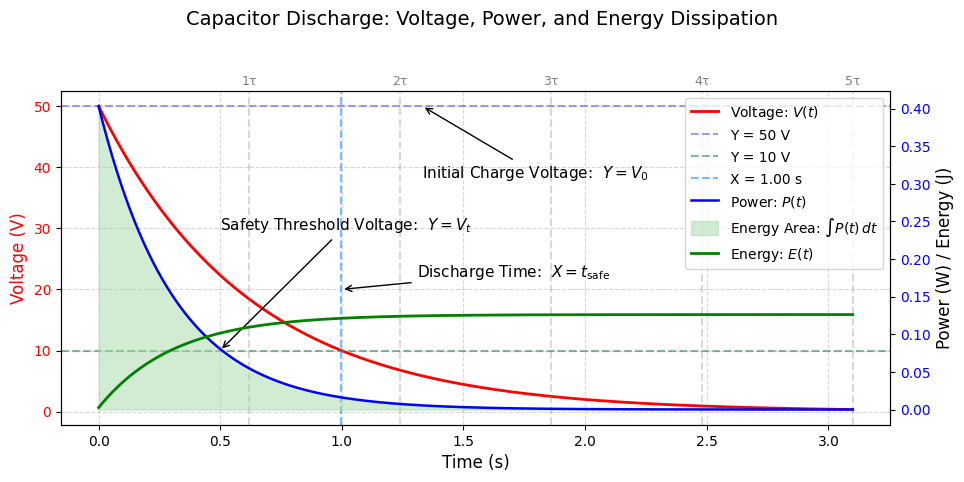

In [4]:
# Contune with the second example
R_ohm = 6_200  # Closest standard resistor value to 6213.35 Ω

t = dis.solve_time(V0, Vt, R_ohm, C)
power = dis.initial_power(V0, R_ohm)
tau = dis.time_constant(R_ohm, C)
energy = dis.total_energy(C, V0)

print("🔁 Solve for Time")
print(f"Discharge Time: {t:.6f} s")
print(f"Initial Power: {power:.3f} W")
print(f"Time Constant (τ): {tau:.3f} s")
print(f"Total Energy: {energy:.3f} J")

dis.plot_discharge(V0, Vt, R_ohm, C)
